<a href="https://colab.research.google.com/github/jafetimbre/ms-school-stuff/blob/master/image-processing/cv2-tut/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from urllib.request import urlopen, urlretrieve
import matplotlib.pyplot as plt

from IPython.display import HTML
from base64 import b64encode

In [76]:
def show_im(im, size=(12, 6)):
    plt.figure(figsize = size)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

In [109]:
image_names = ["color", "lion", "shapes", "person", "group"]
images = {}

for name in image_names:
    if name == "shapes":
        url = f"https://raw.githubusercontent.com/jafetimbre/ms-school-stuff/master/image-processing/cv2-tut/res/images/{name}.png"
    else:
        url = f"https://raw.githubusercontent.com/jafetimbre/ms-school-stuff/master/image-processing/cv2-tut/res/images/{name}.jpg"
    req = urlopen(url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    images[name] = cv2.imdecode(arr, -1)

[Youtube](https://youtu.be/iXNsAYOTzgM)

# Part 1: OpenCV Basics

## L1: Changing color profiles and channels

Image shape: (476, 640, 3)


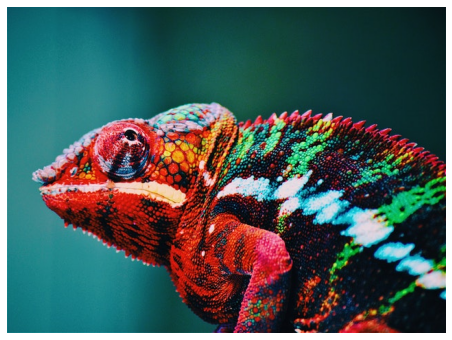

In [44]:
image = images["color"]

print(f"Image shape: {image.shape}")
show_im(image)

Image shape: (476, 640)


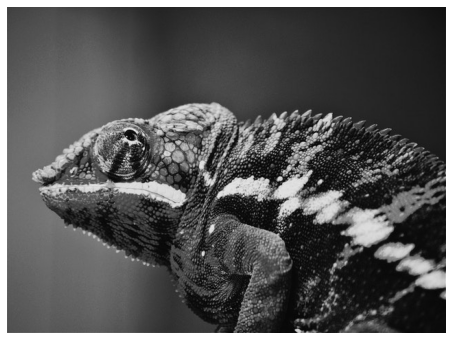

In [45]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(f"Image shape: {gray.shape}")
show_im(gray)

Image shape: (476, 640, 3)


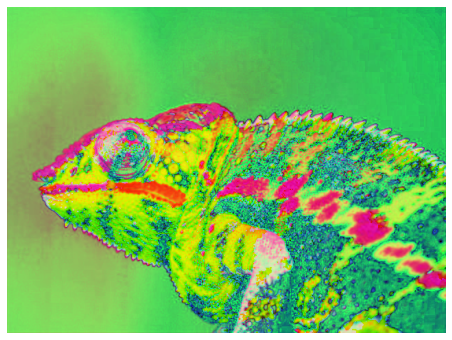

In [46]:
# Hue Saturation Variance (H channel holds all color data)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
print(f"Image shape: {hsv.shape}")
show_im(hsv)

## L2: Edge detection

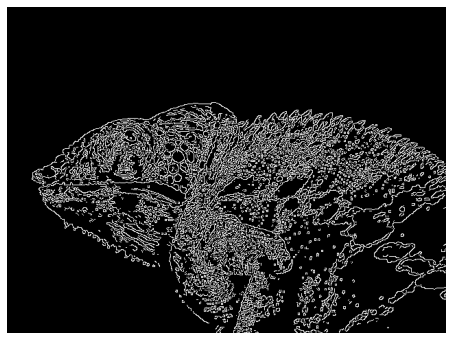

In [47]:
canny_image = cv2.Canny(gray, 150, 200)
show_im(canny_image)

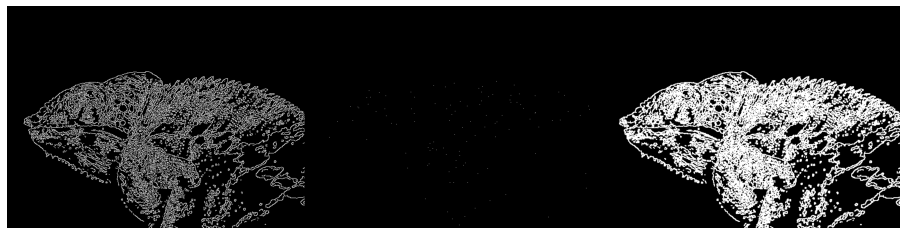

In [48]:
kernel = np.ones((2, 2), np.uint8)

# Erosion
erode_image = cv2.erode(canny_image, kernel=kernel, iterations=1)

# Dilation
dilate_image = cv2.dilate(canny_image, kernel=kernel, iterations=1)

display = np.hstack((canny_image, erode_image, dilate_image))
show_im(display, (16, 6))

## L3: Image manipulation

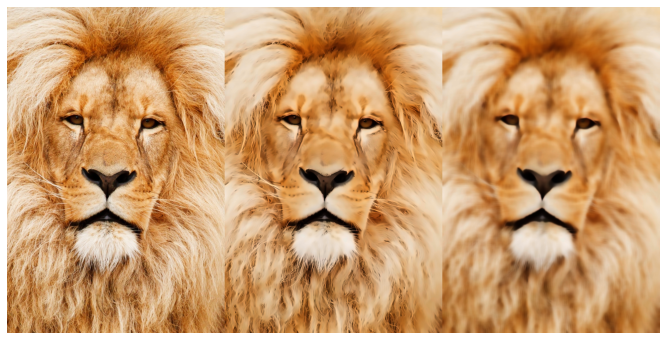

In [55]:
image = images["lion"]

denoise = cv2.fastNlMeansDenoisingColored(image, None, 10, 20, 7, 15)
denoise_hard = cv2.fastNlMeansDenoisingColored(image, None, 50, 20, 7, 15)

display = np.hstack((image, denoise, denoise_hard))
show_im(display)

## L4: Drawing shapes and Writing


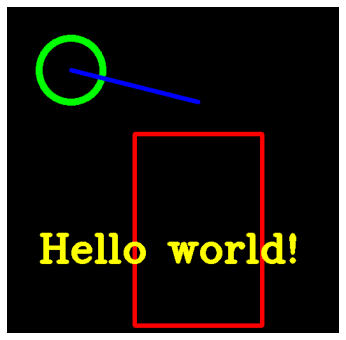

In [73]:
img = np.zeros((512, 521, 3), np.uint8)

cv2.circle(img, (100, 100), 50, (0, 255, 0), 10)
cv2.rectangle(img, (200, 200), (400, 500), (0, 0, 255), 5)
cv2.line(img, (100, 100), (300, 150), (255, 0, 0), 5)
cv2.putText(img, "Hello world!", (50, 400), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 255), 5)

show_im(img)

# Part 2: Intermediate Exercices

## L1: Color Detection

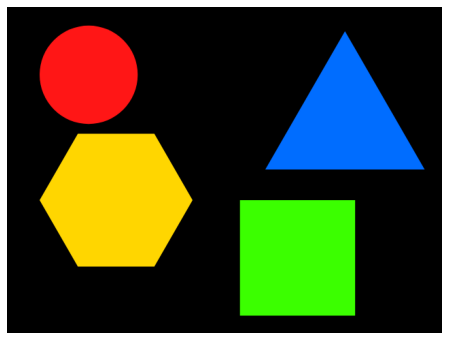

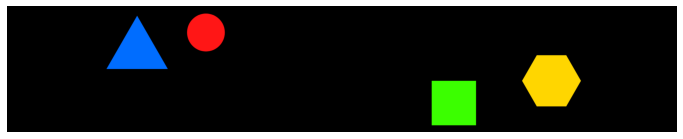

In [114]:
image = images["shapes"]
show_im(image)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Blue colors
lower_hue = np.array([65, 0, 0])
upper_hue = np.array([110, 255, 255])
mask = cv2.inRange(hsv, lower_hue, upper_hue)
b = cv2.bitwise_and(image, image, mask=mask)

# Red colors
lower_hue = np.array([0, 0, 0])
upper_hue = np.array([20, 255, 255])
mask = cv2.inRange(hsv, lower_hue, upper_hue)
r = cv2.bitwise_and(image, image, mask=mask)

# Green colors
lower_hue = np.array([46, 0, 0])
upper_hue = np.array([91, 255, 255])
mask = cv2.inRange(hsv, lower_hue, upper_hue)
g = cv2.bitwise_and(image, image, mask=mask)

# Yellow colors
lower_hue = np.array([21, 0, 0])
upper_hue = np.array([45, 255, 255])
mask = cv2.inRange(hsv, lower_hue, upper_hue)
y = cv2.bitwise_and(image, image, mask=mask)

display = np.hstack((b, r, g, y))
show_im(display)

## L2: Face detection

In [96]:
urlretrieve('https://raw.githubusercontent.com/jafetimbre/ms-school-stuff/master/image-processing/cv2-tut/res/files/haarcascade_frontalface_default.xml', 'haarcascade_frontalface_default.xml')
HAARCASCADE_PATH = './haarcascade_frontalface_default.xml'

In [ ]:
face_cascade = cv2.CascadeClassifier(HAARCASCADE_PATH)

img = images["group"]
img_cpy = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img_cpy, (x, y), (x+w, y+h), (0, 255, 0), 3)

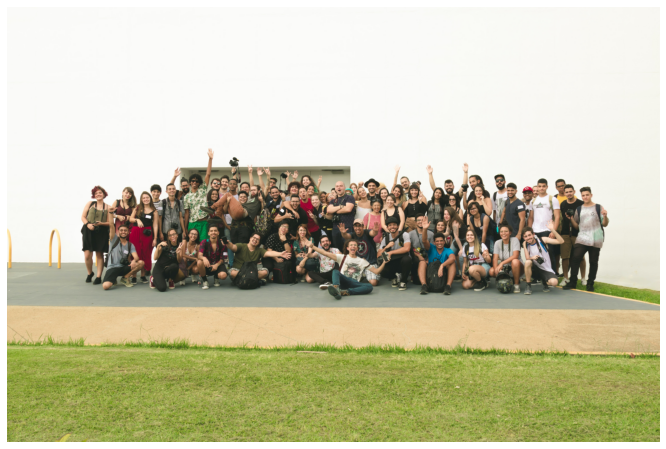

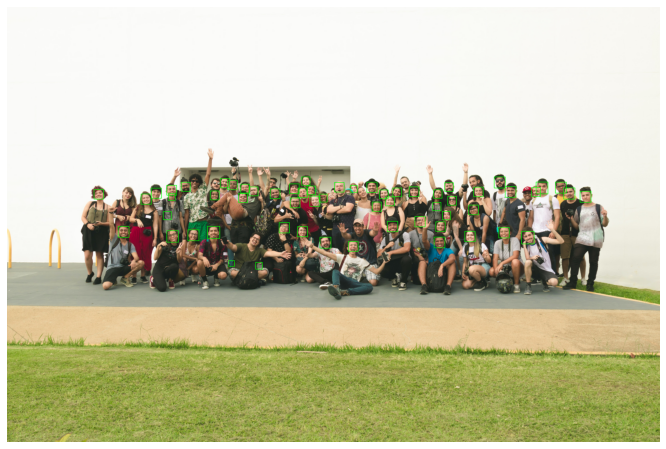

In [107]:
show_im(img, (16, 8))
show_im(img_cpy, (16, 8))

## L3: Shape detection

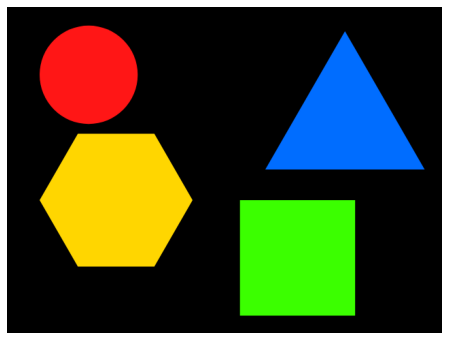

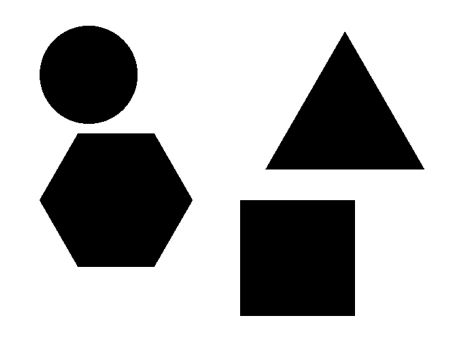

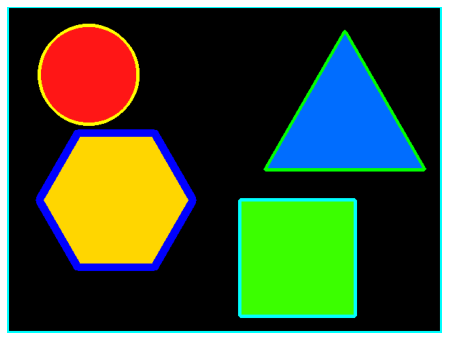

In [117]:
img = images["shapes"]
show_im(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 50, 255, 1)
show_im(thresh)

contours, h = cv2.findContours(thresh, 1, 2)

for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
    n = len(approx)
    if n == 6:
        cv2.drawContours(img, [cnt], 0, 255, 10)
    elif n == 3:
        cv2.drawContours(img, [cnt], 0, (0, 255, 0), 3)
    elif n > 9:
        cv2.drawContours(img, [cnt], 0, (0, 255, 255), 3)
    elif n == 4:
        cv2.drawContours(img, [cnt], 0, (255, 255, 0), 3)

show_im(img)

# Part 3: Projects

## P1: Tracking a Ball

In [147]:
urlretrieve('https://github.com/jafetimbre/ms-school-stuff/raw/master/image-processing/cv2-tut/res/videos/video.mp4', 'video.mp4')
VIDEO_PATH = './video.mp4'

In [148]:
mp4 = open(VIDEO_PATH,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=500 controls muted>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [149]:
ball = []
cap = cv2.VideoCapture(VIDEO_PATH)

# OUT_VIDEO_PATH = 'output.mp4'
# out = cv2.VideoWriter(OUT_VIDEO_PATH, cv2.VideoWriter_fourcc(*'MP4V'), 10, (1920, 1080))

while cap.isOpened():
    ret, frame = cap.read()
    if ret is False:
        break

    # Filter the ball using hues
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_hue = np.array([21, 0, 0])
    upper_hue = np.array([45, 255, 255])
    mask = cv2.inRange(hsv, lower_hue, upper_hue)

    # Fining the contours
    (contours, _) = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    center = None

    if len(contours) > 0:
        c = max(contours, key=cv2.contourArea)
        ((x, y), radius) = cv2.minEnclosingCircle(c)
        M = cv2.moments(c)

        try:
            # Geting the center from the moments
            center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
            cv2.circle(frame, center, 10, (255, 0, 0), -1)
            ball.append(center)
        except:
            pass

        if len(ball)>2:
            for i in range(1,len(ball)):
                cv2.line(frame, ball[i-1], ball[i],(0,0,255),5)
    # out.write(frame)
# out.release()

In [150]:
urlretrieve('https://github.com/jafetimbre/ms-school-stuff/raw/master/image-processing/cv2-tut/res/videos/output.mp4', 'output.mp4')
OUT_VIDEO_PATH = './output.mp4'

In [151]:
mp4 = open(OUT_VIDEO_PATH,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=500 controls muted>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# P2: Face Recognition

In [154]:
!git clone https://github.com/misbah4064/face_recognition.git
!pip install face_recognition -q
%cd face_recognition

Cloning into 'face_recognition'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.
/content/face_recognition


In [155]:
import face_recognition

RuntimeError: ignored

In [ ]:
face_1 = face_recognition.load_image_file("elon.jpg")
face_1_encoding = face_recognition.face_encodings(face_1)[0]

face_2 = face_recognition.load_image_file("Donald Trump.jpg")
face_2_encoding = face_recognition.face_encodings(face_2)[0]

face_3 = face_recognition.load_image_file("jeffbezos.jpg")
face_3_encoding = face_recognition.face_encodings(face_3)[0]

known_face_encodings = [ face_1_encoding, face_2_encoding, face_3_encoding]

known_face_names = ["Elon Musk", "Donald Trump", "Jeff Bezos"]

In [ ]:
file_name = "unknown_do.jpg"
unknown_image = face_recognition.load_image_file(file_name)
unknown_image_to_draw = cv2.imread(file_name)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

for (top,right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]
    cv2.rectangle(unknown_image_to_draw, (left, top), (right, bottom),(0,255,0),3)
    cv2.putText(unknown_image_to_draw,name, (left, top-20), cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2, cv2.LINE_AA)

cv2_imshow(unknown_image_to_draw)